# Lab 6: Logistic Maps and Chaos

This week, we will begin discussing chaos with the simplest chaotic system, the logistic map. Mathematically speaking, a "map" is a simple, iterative rule in which the next value of the map is given in terms of the previous value. The logistic map was popularized by Robert May, a population biologist, as a model for the population of insects. Take a discrete version of the exponential growth equation,

$$
\frac{N_{i+1} - N_i}{\Delta t} = \gamma N_i
$$

$N_i$ is the number of insects in generation $i$, where $\Delta t$ is the time between generations. Of course, when $\gamma > 0$ predicts infinite growth. This is not a very good model for insect populations, as there are not infinite numbers of them. Instead, the logistic map substitues $\gamma \to \gamma' (N_* - N_i)$. This has the effect of *decreasing* the growth rate $\gamma$ as the population tends to a maximum **carrying capacity** $N_*$. Substituting this in and rearranging to get a map for the $i+1$ generation from the $i$th gives us the **logistic map**:

$$
N_{i+1} = N_i + \gamma' \Delta t (N_* - N_i) N_i,
$$

which is usuallty rewritten in the following form

$$
N_{i+1} = N_i (1 + \gamma' \Delta t N_*)\left[ 1- \frac{\gamma' \Delta t}{1+\gamma' \Delta t N_*}N_i \right].
$$

**Confirm this form by rederiving it from the form above**. As is often typical in computational problems, it is much more convenient to express the equation in terms of *dimensionless* variables. We can non-dimensionalize any term by dividing it by a reference quantity with the same dimension. For example, we can non dimensionalize the distance from Carnegie to the chapel in terms of my height. According to Google maps, the distance is $L = 165.4\ \mathrm{m}$. My height is $h_{Oishi} = 1.7\ \mathrm{m}$. Thus the dimensionless distance to the chapel is $x = L/h_{Oishi} = 97.3$. Returning to the problem at hand, we can non-dimensionalize the number of insects in terms of a combination of the dimensionless time $\gamma' \Delta t$ and the carrying capacity $N_*$

$$
x_i \equiv \frac{\gamma' \Delta t}{1 + \gamma' \Delta t N_*} N_i,
$$

and further defining $\mu \equiv 1 + \gamma' \Delta t N_*$, we end up with the dimensionless logistic map

$$
x_{i+1} = \mu x_i (1-x_i).
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (5,4)

This equation can be solved without the use of an ODE solver simply by using a for loop. Implement a function `logistic` that takes $\mu$, the initial dimensionless population $x_0$, and the number of generations `niter` and returns an array (`val_array`) with the calculated values: 

In [15]:
def logistic(mu,x0,niter):
    val_array = [x0]
    x = x0 # to avoid confusion
    for i in range(niter):
        x = mu*x*(1-x)
        val_array.append(x)
    return val_array

Run this function for $mu = 2.8$ and an initial condition of $x_0 = 0.75$. Run it for `niter=100`. Make a plot of the dimensionless population versus iteration number, which you can do by simply doing `plt.plot(x)`, where `x` is the output array from `logistic`.

In [18]:
x = logistic(2.8,0.75,100)
print(x)
print(len(x))

[0.75, 0.5249999999999999, 0.69825, 0.589951425, 0.6773444751933142, 0.6119370239315423, 0.6649162874853781, 0.6238473307417123, 0.6570531482708282, 0.6309360641310195, 0.6519960919076571, 0.6353121265254373, 0.6487337595624593, 0.6380591525459662, 0.646631077115211, 0.6397981162272925, 0.6452781627580411, 0.6409039151918147, 0.64440904271413, 0.641608879470688, 0.6438513907141572, 0.6420589766908881, 0.6434938919963056, 0.6423466082873072, 0.6432648407054797, 0.6425305191693738, 0.6431181430948646, 0.642648151927818, 0.6430242133044188, 0.6427234083442258, 0.6429640803897007, 0.6427715608113161, 0.6429255879858018, 0.6428023736369559, 0.6429009498342234, 0.6428220919021349, 0.6428851801811547, 0.642834710796877, 0.642875087096403, 0.6428427865641467, 0.6428686273144508, 0.6428479549219968, 0.6428644929688888, 0.6428512626164785, 0.6428618469528581, 0.6428533795186108, 0.6428601534883128, 0.6428547343268279, 0.6428590696651519, 0.6428556014003403, 0.6428583760159319, 0.6428561563258537

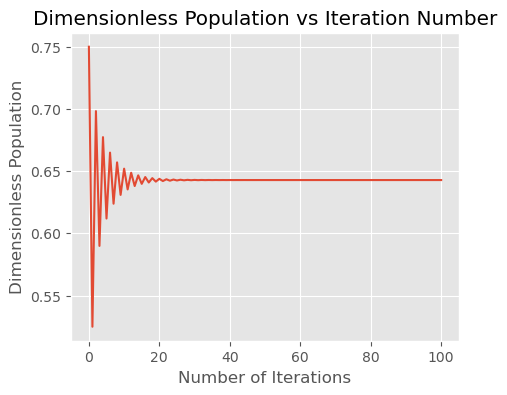

In [19]:
iter_ls = [i for i in range(101)]
plt.plot(iter_ls, x)
plt.title("Dimensionless Population vs Iteration Number")
plt.xlabel("Number of Iterations")
plt.ylabel("Dimensionless Population")
plt.show()

Explain what you see. There is a brief period called the **transient** at the beginning. Note how the long term behavior of the map is a single value. This is called a *one-cycle fixed point*, so called because the population reaches a single value which it keeps for all future times, a so-called steady state, $x_*$.  

Try a value of $\mu = -0.75$. Before running it, make a *prediction* of what should happen. 

Now, run and plot 100 iterations of $\mu = 0, 0.5, 1.0, 1.5, 2$. Each of these should limit to a one-cycle fixed point. 


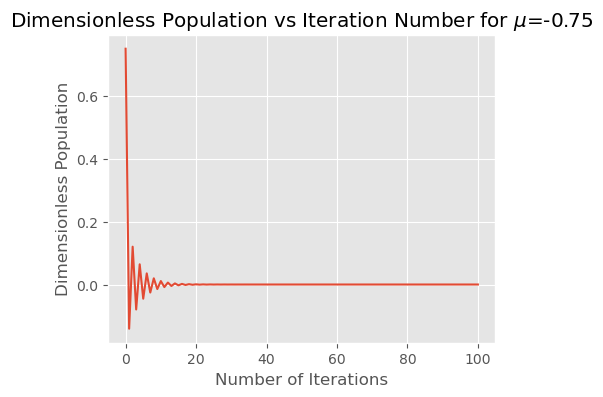

In [22]:
# I think it will approach zero as the 
# growth will go in the opposite direction of the dimentionless 
# populations and should therefore hop around zero
vals2 = logistic(-.75,0.75,100)
plt.plot(iter_ls, vals2)
plt.title("Dimensionless Population vs Iteration Number for $\mu$=-0.75")
plt.xlabel("Number of Iterations")
plt.ylabel("Dimensionless Population")
plt.show()

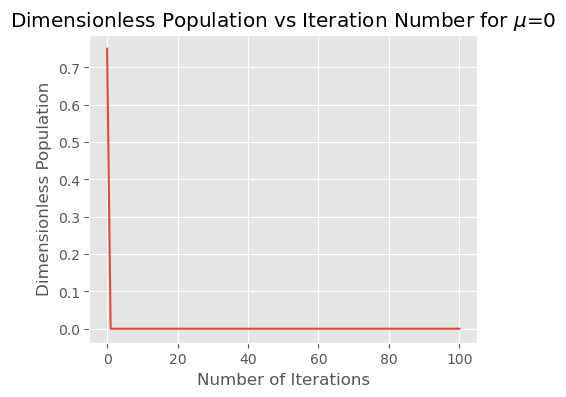

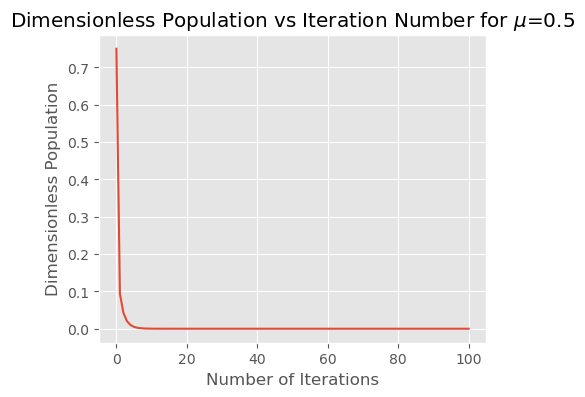

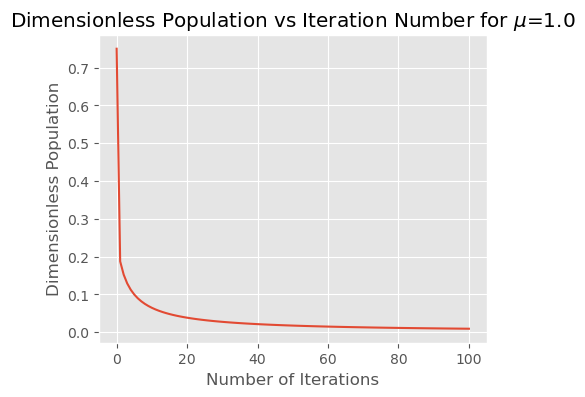

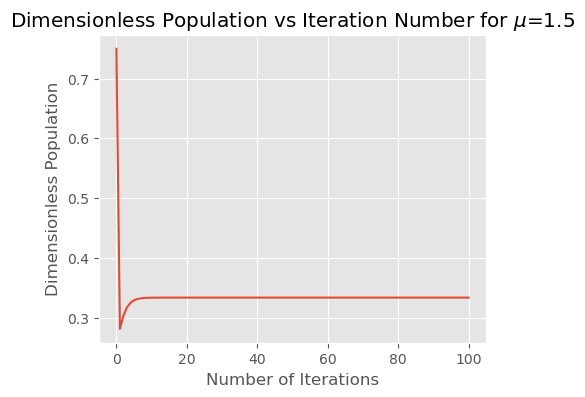

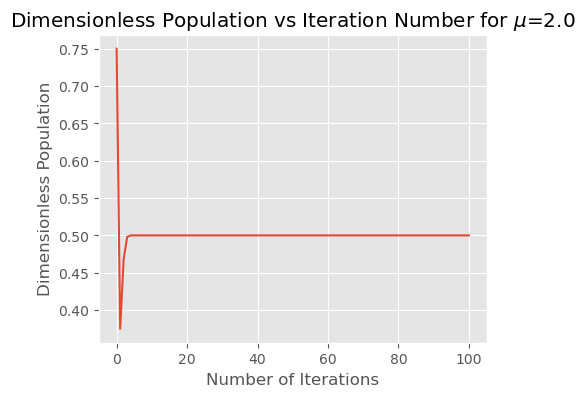

In [25]:
mus = [0,.5,1.,1.5,2.]
for mu in mus:
    vals3 = logistic(mu,0.75,100)
    plt.plot(iter_ls, vals3)
    plt.title(f"Dimensionless Population vs Iteration Number for $\mu$={mu}") 
    plt.xlabel("Number of Iterations")
    plt.ylabel("Dimensionless Population")
    plt.show()

## Prediction of Steady state
We can, in fact, predict the values of $x_*$ for these cases. After the transient, $x_{i+1} = x_i = x_*$. Substitute this into the logistic map, and solve it in terms of $\mu$. Typeset this result, and plot the value for $x_*$ on the plot by using `plt.axhline(x_star)`. It should match the calculated value.

In [26]:
x   = []
mus = []
for mu in [0, 0.5, 1.0, 1.5, 2]:
    x.append(logistic(mu, 0.75, 100))
    mus.append(mu)

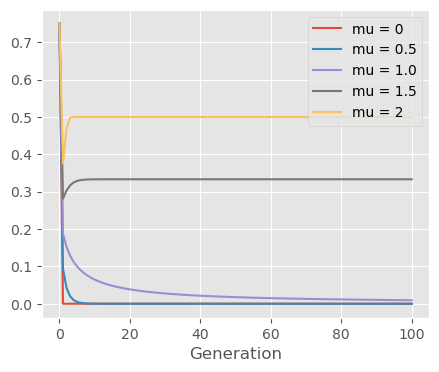

In [28]:
plt.figure()
for mu, data in zip(mus, x):
    plt.plot(data, label=f"mu = {mu}")
    plt.xlabel(r"$x_i$")
    plt.xlabel(r"Generation")
    plt.legend()

## Entering the Chaotic regime

So far, the output of the logistic map has been rather uninteresting: after an initial transient, the population of the insects settles into a constant. Now try setting $\mu = 3.3$. Plot the results in the cell below. What happens?

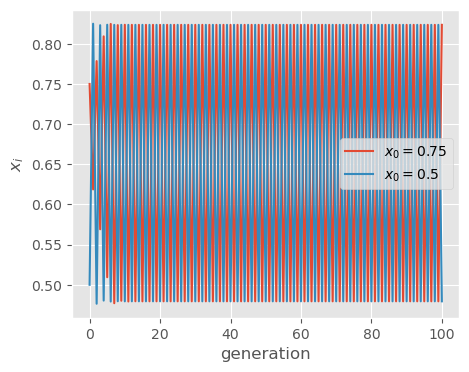

In [29]:
plt.figure()
x_ch = logistic(3.3,0.75,100)
x_ch_2 = logistic(3.3,0.5,100)
plt.plot(x_ch, label=r'$x_0 = 0.75$')
plt.plot(x_ch_2, label=r'$x_0 = 0.5$')
plt.xlabel("generation")
plt.ylabel(r"$x_i$")
plt.legend()

Initial conditions do not matter and the same the model osccilates between the same two values. 

To be more precise about it, print the last 10 elements of $x$. You should see two values to fairly high precision. Try adjusting $x_0$ to a different value (keeping $0 < x_0 < 1$). You should reach the same two numbers. Plot both the iterations of both maps on the same plot. 

Now, turn $\mu$ up further. Set it to 3.5. You should see a *four-cycle*, that is, a repetition of four values. Turn it up even more, to 3.8. You should now have entered the **chaotic regime**. The values should bounce around seemingly randomly. Yet there is no randomness in this system! Every iteration is precisely generated from the one before it by the very simple rule you have seen.

Run two values of $x_0$ that differ by only $10^{-14}$. for $\mu = 3.5$ and $\mu=3.8$. You should see one of the hallmarks of chaos: *sensitive dependence on initial conditions*. Does $\mu=3.5$ display sensitive dependence on initial conditions?

In [30]:
print(x_ch[-10:])
print(x_ch_2[-10:])

[0.4794270198242338, 0.8236032832060687, 0.4794270198242346, 0.8236032832060689, 0.47942701982423414, 0.823603283206069, 0.4794270198242338, 0.8236032832060687, 0.4794270198242346, 0.8236032832060689]
[0.823603283206069, 0.4794270198242338, 0.8236032832060687, 0.4794270198242346, 0.8236032832060689, 0.47942701982423414, 0.823603283206069, 0.4794270198242338, 0.8236032832060687, 0.4794270198242346]


In [31]:
def plot_logistic(x_list):
    #plt.figure()
    for x in x_list:
        plt.plot(x)
    plt.xlabel("generation")
    plt.ylabel(r"$x_i$")

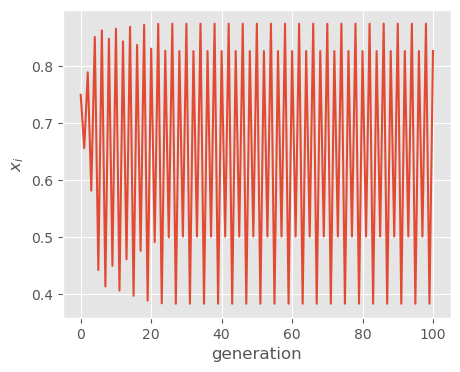

In [32]:
x_35 = logistic(3.5,0.75,100)
plot_logistic([x_35,])


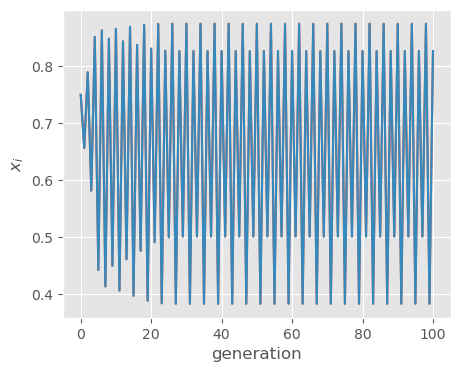

In [40]:
x_35_1 = logistic(3.5,0.75,100)
x_35_2 = logistic(3.5,0.75+1e-14,100)
plot_logistic([x_35_1,x_35_2])

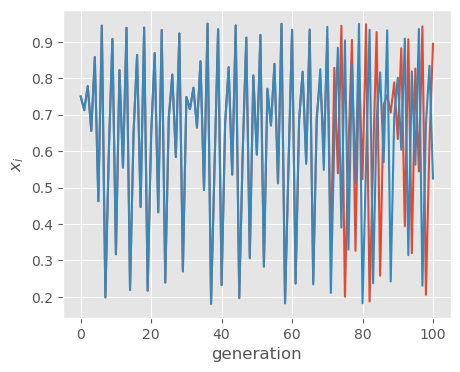

In [41]:
x_38_1 = logistic(3.8,0.75,100)
x_38_2 = logistic(3.8,0.75+1e-14,100)
plot_logistic([x_38_1,x_38_2])

## Bifurcation diagrams

What is happening as we turn up $\mu$? We see that we go from a single value $x_*$ for the final population to two alternating values to four to complete chaos. There is *far, far* more to the logistic map than this. We have only scratched the surface! Before we go any further, we need a clear graphical representation of these results. Such a plot is called a **bifurcation diagram**, and it plots the value of our paramter $\mu$ on the x axis, and the final population values (or at least some of them) on the y axis. 

Let's make a crude bifurcation diagram. First, create an array of mu values from 1 to 4 by doing `mu = np.linspace(1,4,5000)`. Then, for each value `m` in `mu`, run your logistic map program for long enough to get past any transients (it should be something like at least 400 iterations). Take only the last 50 of them, and add them to a list `x_plt`. Also, add 50 copies of the `m` value to a list (since every one of the `mu`s will be the same for those 50 `x` points). Finally, plot this using very tiny points. 

Use the code below to experiment with different numbers of iterations and different values of $x_0$. You might need to put this into a function of its own. Spend some time understanding exactly what this diagram is telling you.

In [42]:
x0 = 0.75

mu = np.linspace(1,4,5000)
x_plt = []
mu_plt = []
for m in mu:
    xtmp = logistic(m,x0,400)
    mu_plt += 50*[m]
    x_plt += xtmp[-50:]

Text(0, 0.5, '$x_*$')

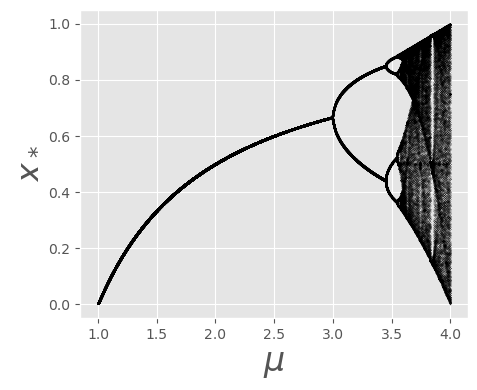

In [43]:
plt.figure()
plt.plot(mu_plt,x_plt,'ko',markersize=0.1)
plt.xlabel(r'$\mu$',fontsize=24)
plt.ylabel(r'$x_*$',fontsize=24)

A better bifurcation diagram would eliminate duplicate points, and over lay several values of $x_0$ to ensure no fixed points are missed.